# Model regularization 

In [4]:
import numpy as np

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

sample_size = 30
def fnc(x):
    return 10*x**4+0.5*x**2+0.5e4*np.random.rand(sample_size)

x=np.linspace(0,5,sample_size)
y=fnc(x) 

x=x.reshape(-1,1)
y=y.reshape(-1,1)


Text(0.5, 1.0, 'Data points')

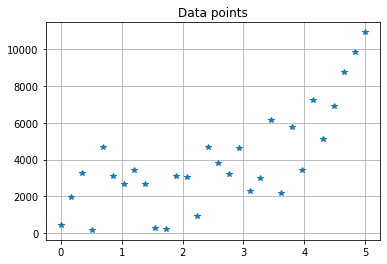

In [6]:
import matplotlib.pyplot as plt

plt.plot(x, y, '*')
plt.grid()
plt.title('Data points')

## Fitting linear regresison model to the data

Text(0.5, 1.0, 'Linear model')

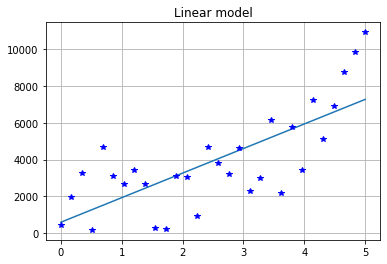

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x,y)
plt.plot(x, lr.predict(x))
plt.plot(x, y, '*b')
plt.grid()
plt.title('Linear model')

## Polynomial model

In [8]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(15)
x_poly = pf.fit_transform(x)

array([[ 0.00000000e+00, -1.38963929e+04,  3.82109935e+05,
        -2.24125806e+06,  6.31998901e+06, -1.04207987e+07,
         1.10831357e+07, -8.05404091e+06,  4.13792340e+06,
        -1.53013641e+06,  4.09093533e+05, -7.83845234e+04,
         1.04918131e+04, -9.31074329e+02,  4.91855128e+01,
        -1.16971103e+00]])

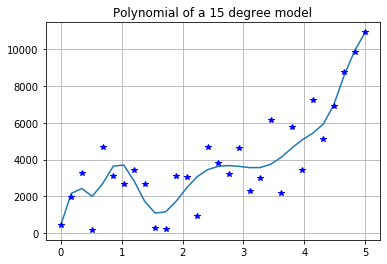

In [11]:
lr_poly = LinearRegression()

lr_poly.fit(x_poly, y)
plt.plot(x, lr_poly.predict(x_poly))
plt.plot(x,y, '*b')
plt.grid()
plt.title('Polynomial of a 15 degree model')
lr_poly.coef_

## [Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) (regresja grzbietowa)

/home/darek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.20464e-22): result may not be accurate.
  overwrite_a=True).T


Text(0.5, 1.0, 'Ridge regression model')

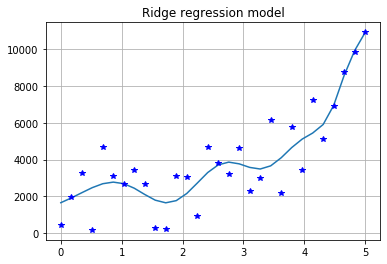

In [10]:
from sklearn.linear_model import Ridge # regresja grzbietowa
ridge = Ridge(alpha=0.5, solver="cholesky")
ridge.fit(x_poly,y)

plt.plot(x, ridge.predict(x_poly))
plt.plot(x,y, '*b')
plt.grid()
plt.title('Ridge regression model')

In [8]:
ridge.coef_

array([[ 0.00000000e+00, -4.25013388e+02, -3.78282255e+02,
        -1.96242856e+02,  5.92351041e+01,  2.37912272e+02,
         1.81849150e+02, -7.92555047e+01, -2.08029214e+02,
         7.12251552e+01,  1.06009971e+02, -9.64887344e+01,
         3.54124808e+01, -6.85770015e+00,  6.92351756e-01,
        -2.88135132e-02]])

## [Lass regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

/home/darek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24943783.63901801, tolerance: 21836.760460623103
  positive)


Text(0.5, 1.0, 'Lasso regression model')

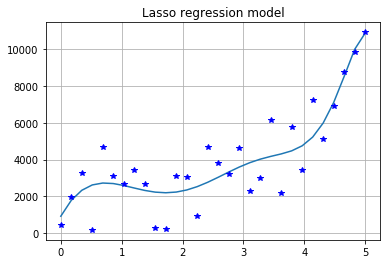

In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5, max_iter=1e5)
lasso.fit(x_poly,y)

plt.plot(x, lasso.predict(x_poly))
plt.plot(x,y, '*b')
plt.grid()
plt.title('Lasso regression model')

In [10]:
lasso.coef_

array([ 0.00000000e+00, -1.21848599e+03,  7.77041045e+02, -3.10055840e+02,
        4.21157940e+01,  1.34696441e+01,  3.63210542e-01, -3.34973911e-01,
       -8.99690449e-02, -1.25774101e-02, -5.12951090e-04,  2.74642202e-04,
        9.69651512e-05,  1.80536744e-05,  1.20415863e-06, -6.48830666e-07])

## [ElasticNet regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

/home/darek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27320704.039741796, tolerance: 21836.760460623103
  positive)


array([ 0.00000000e+00,  7.31530971e+01, -5.13131921e+01, -9.06901913e+01,
        9.08656911e+01,  5.43989852e-01, -4.46336241e+00, -3.57424029e-01,
        2.36903457e-02,  1.36745846e-02,  2.92086487e-03,  4.42004343e-04,
        4.44858052e-05, -7.33721808e-07, -2.04012745e-06, -7.66165713e-07])

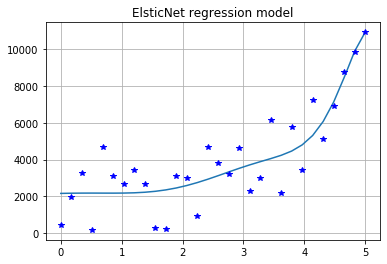

In [15]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=1e5)
elastic.fit(x_poly,y)

plt.plot(x, elastic.predict(x_poly))
plt.plot(x,y, '*b')
plt.grid()
plt.title('ElsticNet regression model')
elastic.coef_

Text(0.5, 1.0, 'Regression models')

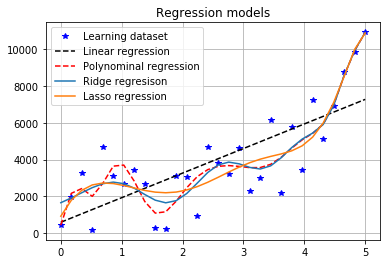

In [14]:
plt.plot()
plt.plot(x, y, '*b', x, lr.predict(x), '--k', 
         x, lr_poly.predict(x_poly), '--r', 
         x, ridge.predict(x_poly), 
         x, lasso.predict(x_poly),
    #     x, elastic.predict(x_poly),
         )

plt.legend(["Learning dataset", 
            "Linear regression", 
            "Polynominal regression", 
            "Ridge regresison", 
            "Lasso regression",
    #        "ElasticNet",
   ])
plt.grid()
plt.title('Regression models')

## Parameter estimation using grid search

In [16]:
from sklearn.model_selection import GridSearchCV

parameters=[{'alpha':[0.1, 0.2, 0.5, 0.9], 'l1_ratio':[0.1, 0.2, 0.5, 0.9]}]
model = GridSearchCV(ElasticNet(), parameters, cv=3)
model.fit(x,y)
print(model.best_params_)
model.best_estimator_

{'alpha': 0.9, 'l1_ratio': 0.1}


ElasticNet(alpha=0.9, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

## Student task
Train Ridge and Lasso Regression for diabetes dataset using polynomial features of degree of 3. Plot MSE over test datasets usign differen values (0.1, 0.5, 0.9) of alpha metaparameter.

Using Lasso Regression detect less important featurs for polynomial models of degree of 3.

Find the best set of parameters for a ElasticNet model using grid search method for 'alpha':[0.1, 0.5, 0.9], 'l1_ratio':[0.1, 0.5, 0.9].

Remember to standardization dataset if needed. 

In [64]:
from sklearn.datasets import load_diabetes

x,y=load_diabetes(return_X_y=True)

In [65]:
from sklearn.preprocessing import PolynomialFeature

scaled_datapf = PolynomialFeatures(3)
x_poly = pf.fit_transform(x)

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_poly = scaler.fit_transform(x_poly)

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_x_poly, y, test_size=0.3, random_state=101) 

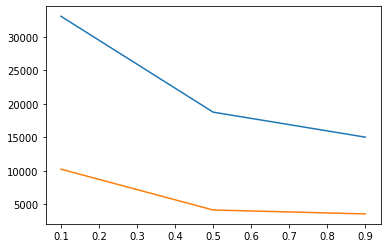

In [80]:
from sklearn.linear_model import Ridge # regresja grzbietowa
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha_vals = [0.1, 0.5, 0.9]
ridge_mse = []
lasso_mse = []

for a in alpha_vals:
    ridge = Ridge(alpha=a, solver="cholesky")
    ridge.fit(x_train, y_train)
    
    lasso = Lasso(alpha=a, max_iter=1e5)
    lasso.fit(x_train,y_train)
    
    ridge_mse.append( mean_squared_error(y_test, ridge.predict(x_test) ) )
    lasso_mse.append( mean_squared_error(y_test, lasso.predict(x_test) ) )

plt.plot(alpha_vals, ridge_mse,
        alpha_vals, lasso_mse)

In [90]:
lasso = Lasso(alpha=0.5, max_iter=1e5)
lasso.fit(x_train,y_train)

print( lasso.coef_ )
print( "Wyzerowano współczynników: ", len( lasso.coef_[lasso.coef_==0] ) )

[  0.           0.          -1.36476172  16.3083813    0.
  -0.          -0.         -13.42904063   0.          30.93119277
  -0.           1.7812175    5.97950111   2.25479362   3.86349941
  -0.          -4.5795644    0.43112889  -0.          -0.
   1.96709531  -0.           0.           4.08941249  -0.
  -0.           5.57942114  -1.32524349  -0.          -0.95108179
   0.           9.29847736   0.           0.          -0.
   0.           1.57066982  -2.47097523  -1.75844637  -0.
  -0.           0.10113446  -1.43148839   0.          -5.37749797
  -0.          -0.           1.3801567   -0.          -0.
   1.05644655  -0.          -0.          -0.          -0.09722011
   0.           3.36955655  -0.           1.17132224   1.33200224
   0.          -0.90524487   4.42039071   0.           2.14727723
   7.13409469  -1.41500058  -8.52608973   0.          -3.6851297
   0.           4.8308133    0.          -0.          -0.
   8.00603677   0.           2.94901621  -3.98335341  -0.
  -0.2650

In [95]:
from sklearn.model_selection import GridSearchCV

parameters=[{'alpha':[0.1, 0.5, 0.9], 'l1_ratio':[0.1, 0.5, 0.9]}]
model = GridSearchCV(ElasticNet(max_iter=1e5), parameters, cv=3)
model.fit(x_train, y_train)
print(model.best_params_)
model.best_estimator_

{'alpha': 0.9, 'l1_ratio': 0.1}


ElasticNet(alpha=0.9, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=100000.0, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [96]:

#ridge = Ridge(alpha=0.5, solver="cholesky")
#ridge.fit(x_train_poly, y_train)
#lasso = Lasso(alpha=0.5, max_iter=1e5)
#lasso.fit(x_train_poly,y_train)

#print("ridge mse: ", mean_squared_error(y_test, ridge.predict(x_test_poly)))
#print("lasso mse: ", mean_squared_error(y_test, lasso.predict(x_test_poly)))